<a href="https://colab.research.google.com/github/V3nugopalKP/Predictive-Modeling-for-Human-MonkeyPox-Detection-using-Symptomatic-Dataset/blob/main/Predictive_Modeling_for_Human_MonkeyPox_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monkeypox detection based on symptoms
**Data**: We are using an opensource dataset which was collected from 25000 patients.<br>

**Process**: First, we would analyze our data, to get a better understanding of our data. After that, we would like to do some data preprocessing techniques. We split the dataset into training and testing. Next, we train the models using the training dataset. Our model will be evaluated for accuracy, log loss, cross-entropy, precision, recall, f1-score, and roc-auc curve.

## Data Understanding

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/DATA.csv')
df

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,None,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,None,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive
...,...,...,...,...,...,...,...,...,...,...,...
24995,P24995,None,True,True,False,True,True,False,False,True,Positive
24996,P24996,Fever,False,True,True,False,True,True,True,True,Positive
24997,P24997,None,True,True,False,False,True,True,False,False,Positive
24998,P24998,Swollen Lymph Nodes,False,True,False,True,True,True,False,False,Negative


In [ ]:
print('Number of samples: ', df.shape[0],"\nNumber of independent variables: ", df.shape[1] - 1,"\nTarget variable or dependent variable: MonkeyPox" )

Number of samples:  25000 
Number of independent variables:  10 
Target variable or dependent variable: MonkeyPox


In [ ]:
df_ = df.copy()
df_

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,None,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,None,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive
...,...,...,...,...,...,...,...,...,...,...,...
24995,P24995,None,True,True,False,True,True,False,False,True,Positive
24996,P24996,Fever,False,True,True,False,True,True,True,True,Positive
24997,P24997,None,True,True,False,False,True,True,False,False,Positive
24998,P24998,Swollen Lymph Nodes,False,True,False,True,True,True,False,False,Negative


In [ ]:
df.MonkeyPox.value_counts()/250

Positive    63.636
Negative    36.364
Name: MonkeyPox, dtype: float64

<Axes: ylabel='MonkeyPox'>

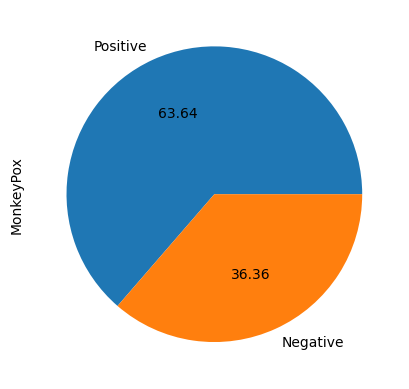

In [ ]:
df.MonkeyPox.value_counts().plot(kind='pie', autopct="%.2f")

<Axes: ylabel='Systemic Illness'>

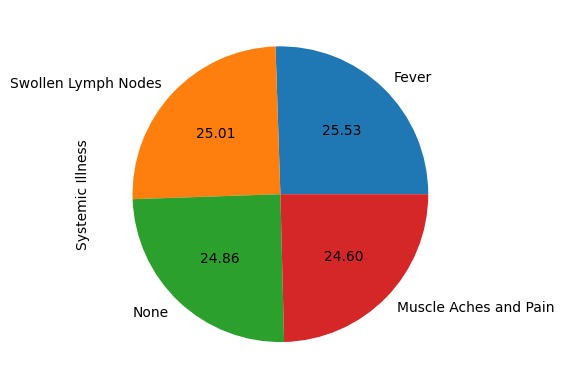

In [ ]:
df['Systemic Illness'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='Systemic Illness'>

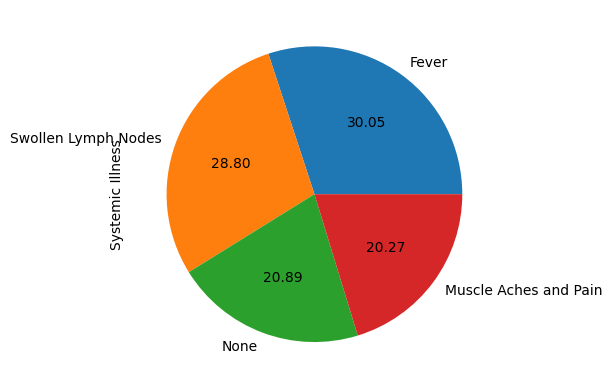

In [ ]:
df[df['MonkeyPox']=='Positive']['Systemic Illness'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='Rectal Pain'>

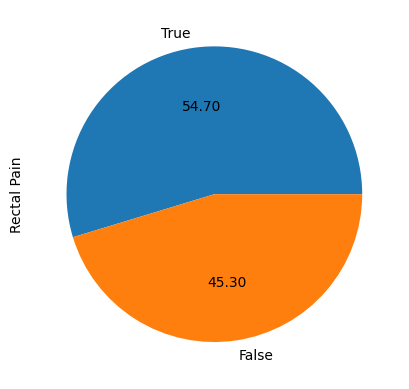

In [ ]:
df[df['MonkeyPox']=='Positive']['Rectal Pain'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='Sore Throat'>

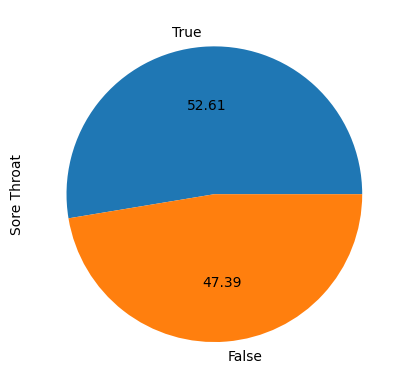

In [ ]:
df[df['MonkeyPox']=='Positive']['Sore Throat'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='HIV Infection'>

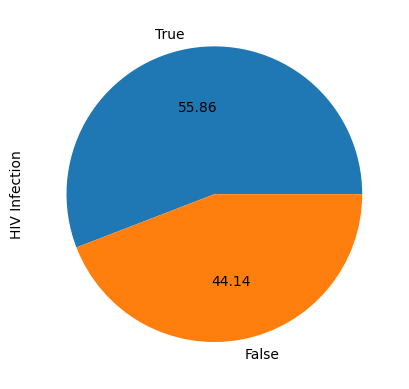

In [ ]:
df[df['MonkeyPox']=='Positive']['HIV Infection'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='Sexually Transmitted Infection'>

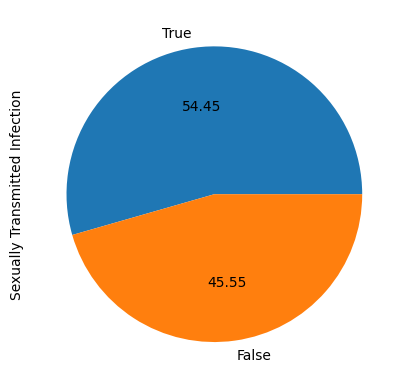

In [ ]:
df[df['MonkeyPox']=='Positive']['Sexually Transmitted Infection'].value_counts().plot(kind='pie',autopct='%.2f')

## Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df_.columns:
  df_[i]=le.fit_transform(df_[i])
df_.drop(['Patient_ID'], axis=1, inplace=True)

In [ ]:
df_.describe().T

,count,mean,std,min,25%,50%,75%,max
Systemic Illness,25000.0,1.49352,1.122822,0.0,0.0,1.0,3.0,3.0
Rectal Pain,25000.0,0.49380,0.499972,0.0,0.0,0.0,1.0,1.0
Sore Throat,25000.0,0.50216,0.500005,0.0,0.0,1.0,1.0,1.0
Penile Oedema,25000.0,0.50448,0.499990,0.0,0.0,1.0,1.0,1.0
Oral Lesions,25000.0,0.49944,0.500010,0.0,0.0,0.0,1.0,1.0
Solitary Lesion,25000.0,0.50108,0.500009,0.0,0.0,1.0,1.0,1.0
Swollen Tonsils,25000.0,0.50132,0.500008,0.0,0.0,1.0,1.0,1.0
HIV Infection,25000.0,0.50336,0.499999,0.0,0.0,1.0,1.0,1.0
Sexually Transmitted Infection,25000.0,0.49784,0.500005,0.0,0.0,0.0,1.0,1.0
MonkeyPox,25000.0,0.63636,0.481056,0.0,0.0,1.0,1.0,1.0


In [ ]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Systemic Illness                25000 non-null  int64
 1   Rectal Pain                     25000 non-null  int64
 2   Sore Throat                     25000 non-null  int64
 3   Penile Oedema                   25000 non-null  int64
 4   Oral Lesions                    25000 non-null  int64
 5   Solitary Lesion                 25000 non-null  int64
 6   Swollen Tonsils                 25000 non-null  int64
 7   HIV Infection                   25000 non-null  int64
 8   Sexually Transmitted Infection  25000 non-null  int64
 9   MonkeyPox                       25000 non-null  int64
dtypes: int64(10)
memory usage: 1.9 MB


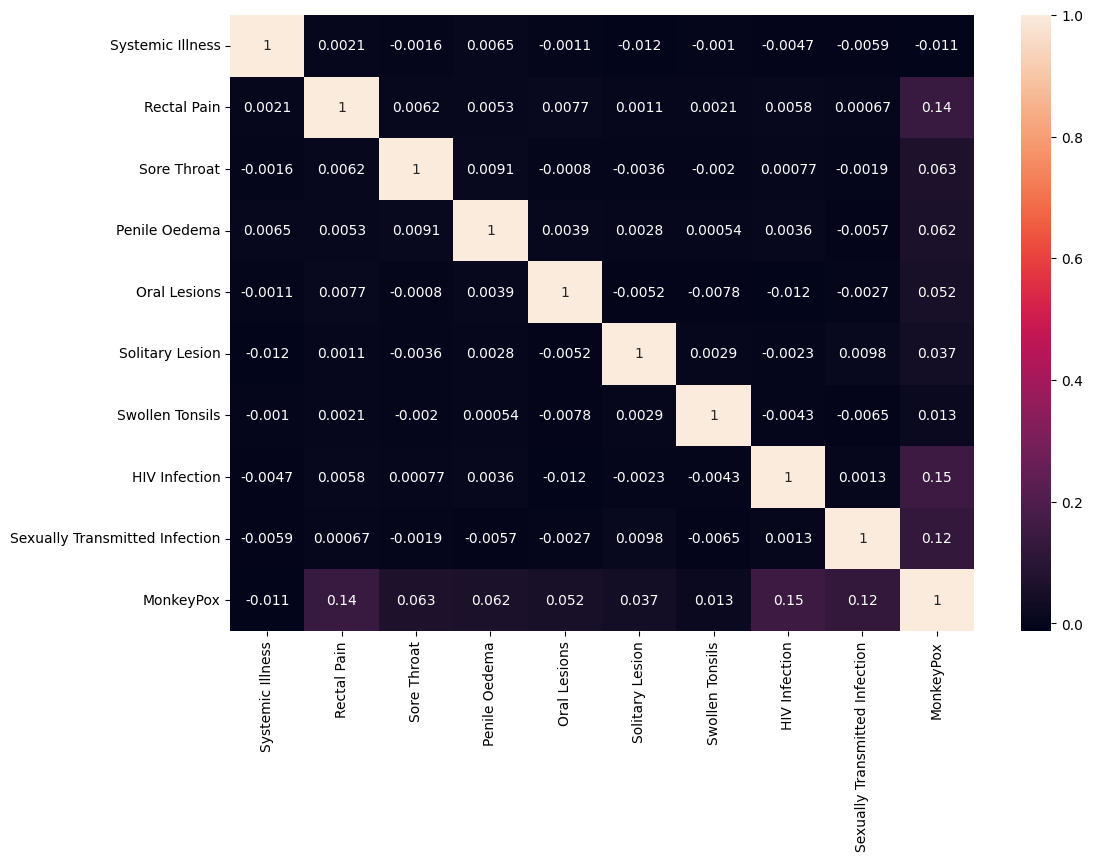

In [ ]:
# heatmap of df

import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(df_.corr(), annot=True)
plt.show()


In [ ]:
X = df_.drop(['MonkeyPox'], axis=1)
y = df_['MonkeyPox']
X.shape, y.shape

((25000, 9), (25000,))

In [ ]:
X

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection
0,2,0,1,1,1,0,1,0,0
1,0,1,0,1,1,0,0,1,0
2,0,0,1,1,0,0,0,1,0
3,2,1,0,0,0,1,1,1,0
4,3,1,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
24995,2,1,1,0,1,1,0,0,1
24996,0,0,1,1,0,1,1,1,1
24997,2,1,1,0,0,1,1,0,0
24998,3,0,1,0,1,1,1,0,0


In [ ]:
# prompt: traintest split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Decision Tree Classifier

In [ ]:
# prompt: Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# evaluate the model
y_pred = dt.predict(X_test)
print("Accuracy: ",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.688
              precision    recall  f1-score   support

           0       0.58      0.39      0.47      1754
           1       0.72      0.85      0.78      3246

    accuracy                           0.69      5000
   macro avg       0.65      0.62      0.62      5000
weighted avg       0.67      0.69      0.67      5000



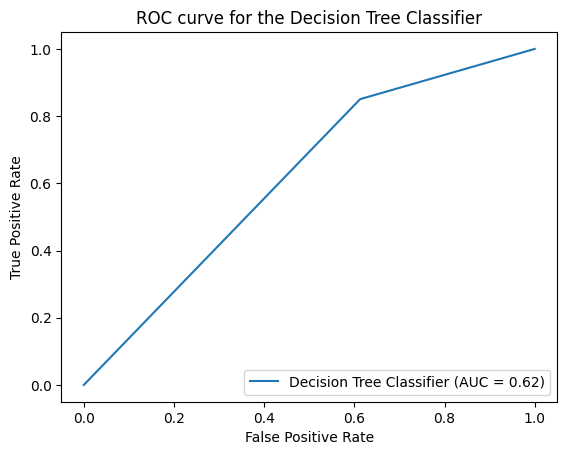

In [ ]:
# prompt: generate loss graph of decision tree classifier model in both training and test dataset

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# calculate AUC
auc = roc_auc_score(y_test, y_pred)

# plot ROC curve
plt.plot(fpr, tpr, label='Decision Tree Classifier (AUC = %0.2f)' % auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for the Decision Tree Classifier")
plt.legend(loc='lower right')
plt.show()


Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.6813
              precision    recall  f1-score   support

           0       0.59      0.43      0.50      1754
           1       0.73      0.84      0.78      3246

    accuracy                           0.70      5000
   macro avg       0.66      0.63      0.64      5000
weighted avg       0.68      0.70      0.68      5000



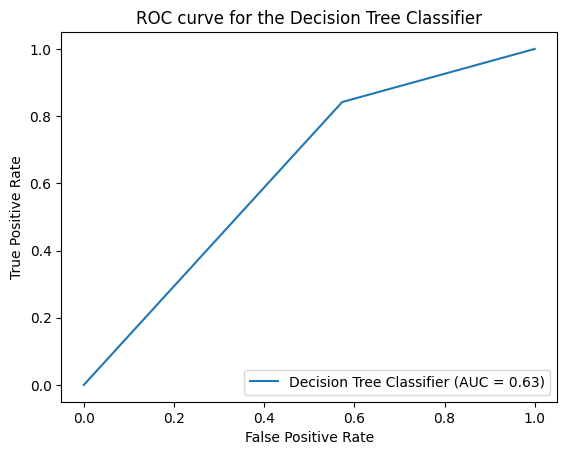

In [ ]:

# prompt: hyperparameter tuning of decisionTreeclassifier

# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 5, 10, 15]
}

grid_search = GridSearchCV(dt, parameters, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Retrain the model with the best parameters
dc = DecisionTreeClassifier(**grid_search.best_params_)
dc.fit(X_train, y_train)

# Evaluate the model
y_pred = dc.predict(X_test)
print(classification_report(y_test, y_pred))

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label='Decision Tree Classifier (AUC = %0.2f)' % auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for the Decision Tree Classifier")
plt.legend(loc='lower right')
plt.show()


In [ ]:
# prompt: use kfold cross validation to get best model of decisiontreeclassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Create a k-fold cross-validator
kfold = KFold(n_splits=5)

# Evaluate the model using k-fold cross-validation
scores = cross_val_score(dc, X, y, cv=kfold)

# Print the mean and standard deviation of the scores
print("Mean score:", np.mean(scores))
print("Standard deviation:", np.std(scores))


Mean score: 0.68432
Standard deviation: 0.006124834691646779


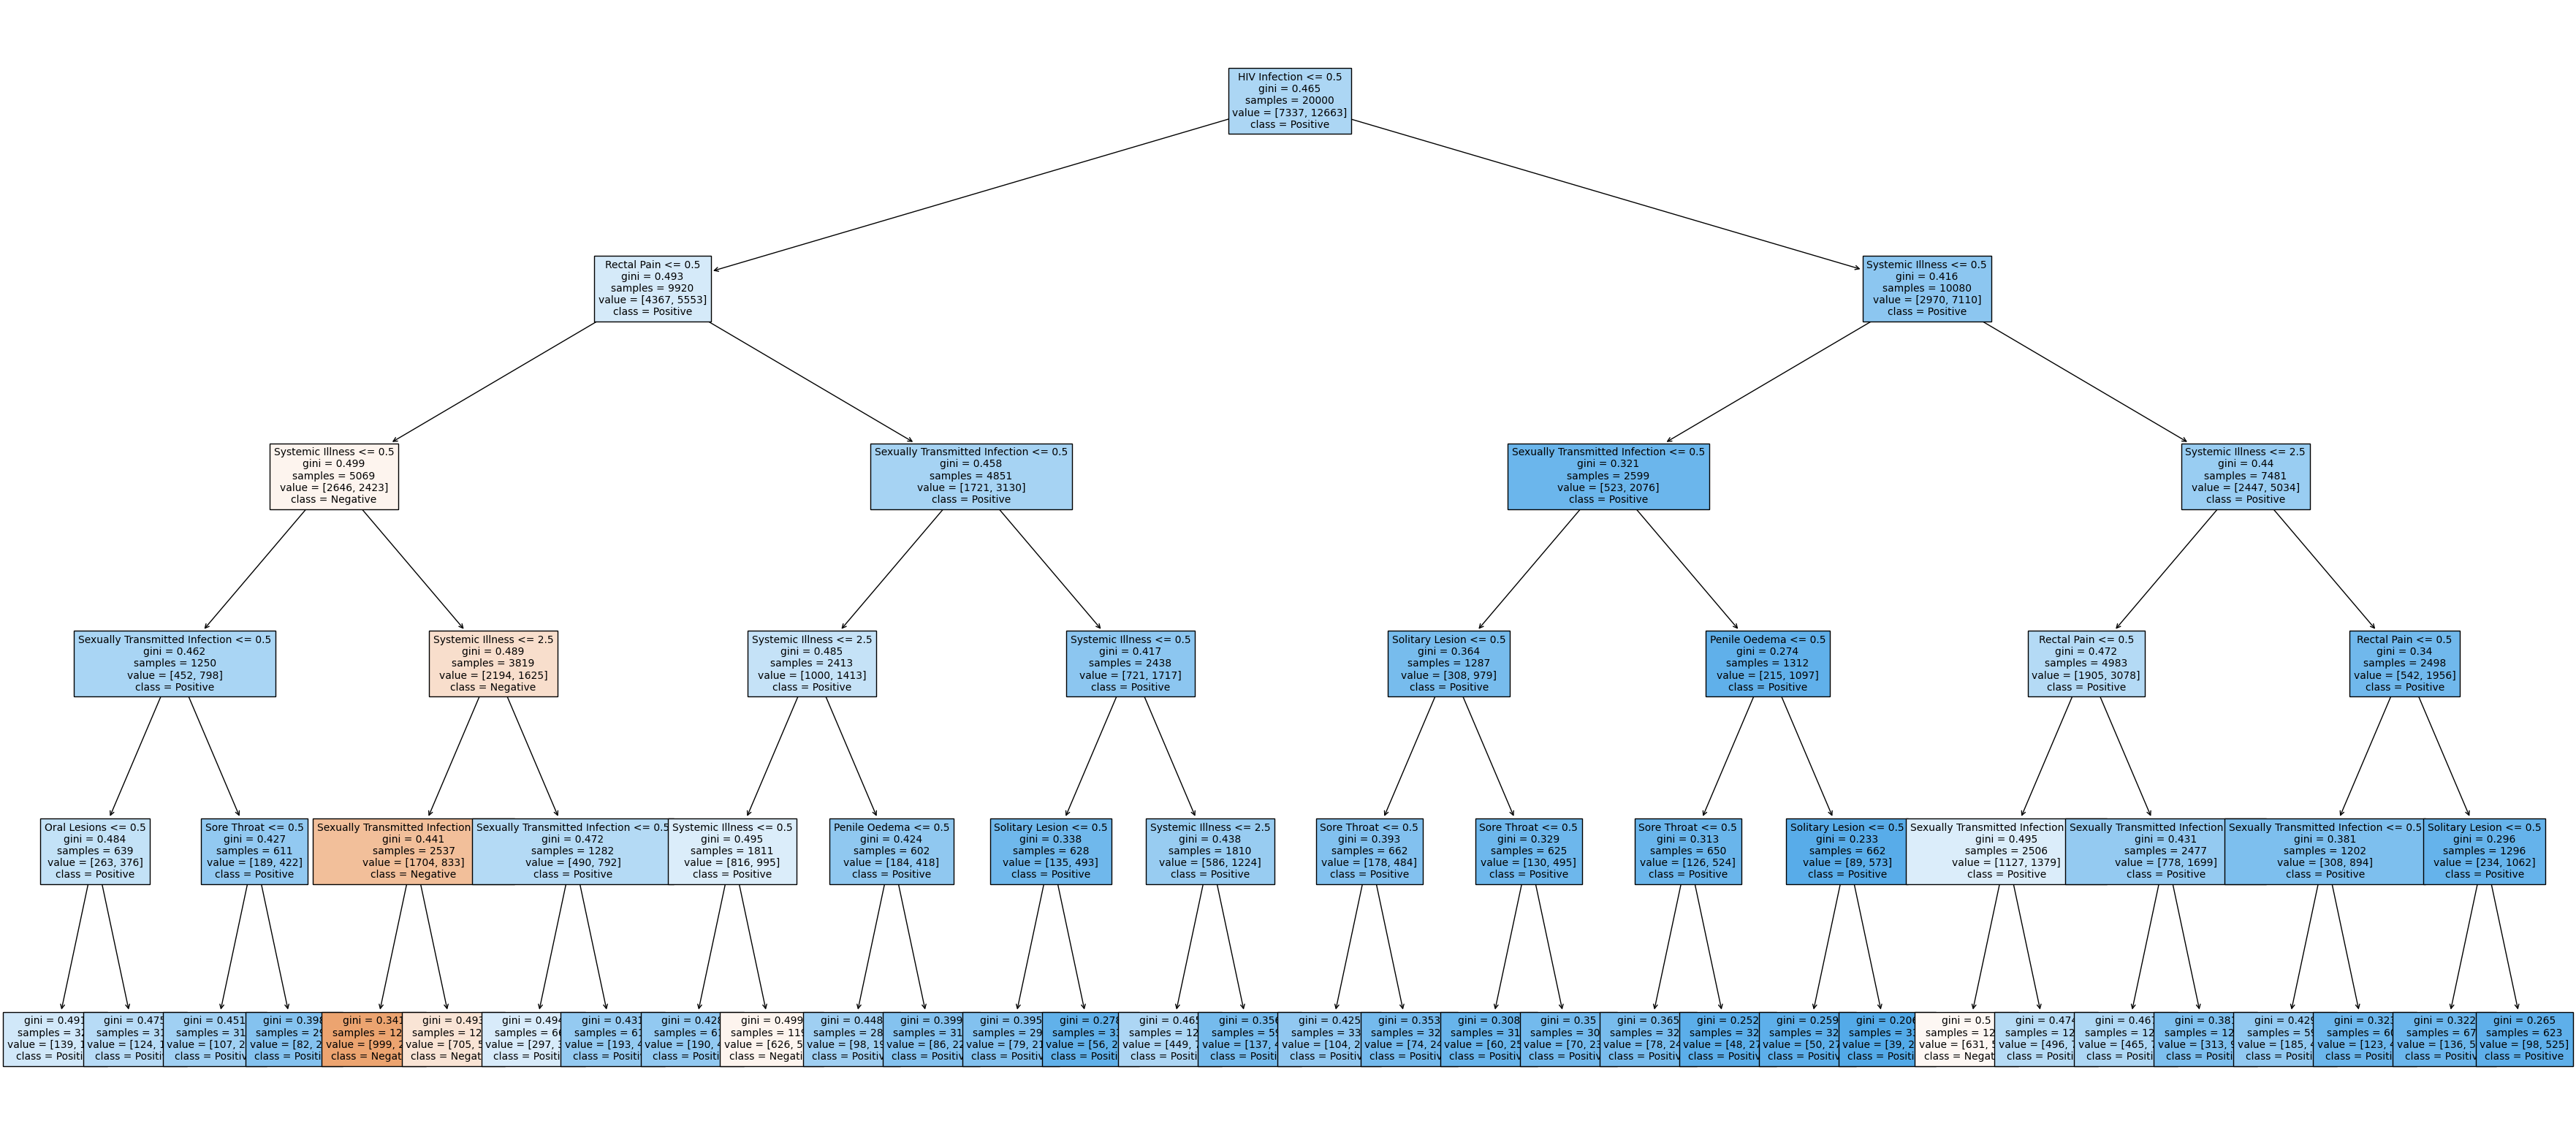

In [ ]:
# prompt: plot the decisiontree

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(45, 20))
plot_tree(dc, feature_names=X.columns, class_names=['Negative', 'Positive'], filled=True, fontsize=10)
plt.show()


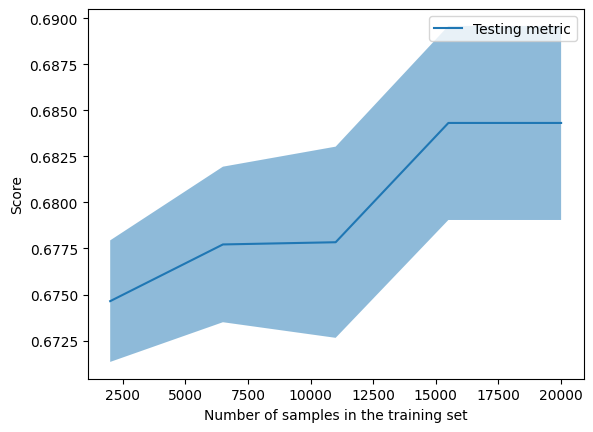

In [ ]:
from sklearn.model_selection import LearningCurveDisplay, learning_curve
LearningCurveDisplay.from_estimator(dc, X, y)

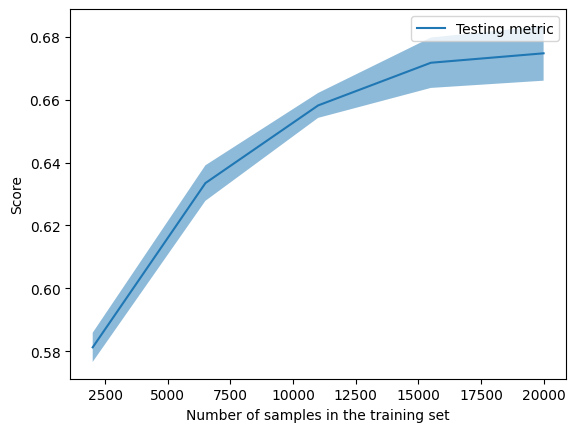

In [ ]:
LearningCurveDisplay.from_estimator(dt, X, y)

0.0


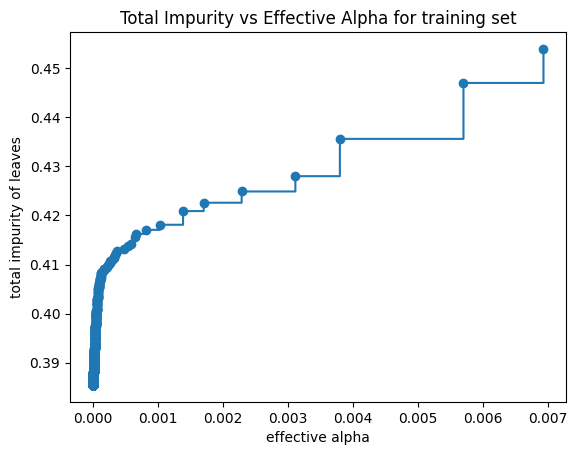

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Construct the decision tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Compute the cost-complexity pruning path
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Plot the pruning path
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs Effective Alpha for training set")

# Find the optimal value for ccp_alpha
optimal_ccp_alpha = ccp_alphas[np.argmin(impurities)]
print(optimal_ccp_alpha)

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=float(ccp_alpha))
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.010595932361751437


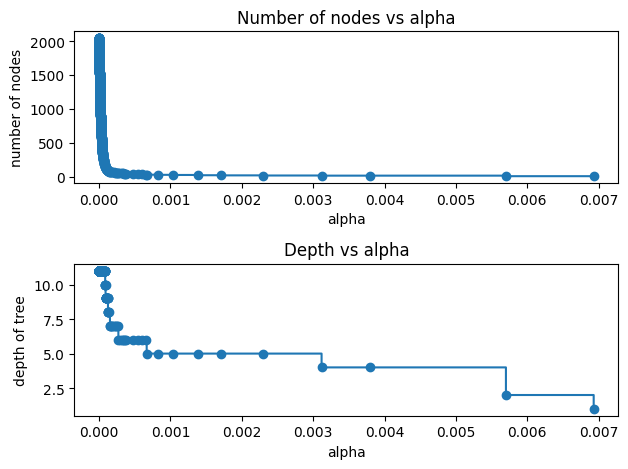

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

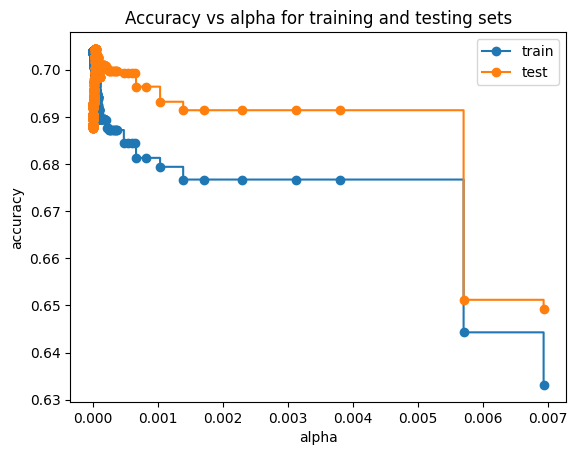

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
best_clf = DecisionTreeClassifier(max_depth=10, ccp_alpha=0.0, random_state=42)
best_clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Classification Report\n-------------------------------\n", classification_report(y_test,y_pred))

Accuracy:  0.6944
Classification Report
-------------------------------
               precision    recall  f1-score   support

           0       0.60      0.39      0.47      1754
           1       0.72      0.86      0.79      3246

    accuracy                           0.69      5000
   macro avg       0.66      0.62      0.63      5000
weighted avg       0.68      0.69      0.67      5000



###Weakest Link Pruning

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Construct the decision tree
clf1 = DecisionTreeClassifier(random_state=42)
clf1.fit(X_train, y_train)

# Prune the tree using weakest link pruning
while True:
    # Find the weakest link
    weakest_link = np.argmin(clf1.tree_.impurity)
    if weakest_link == 0:
        break
    # Prune the weakest link
    clf1.tree_.children_left[weakest_link] = clf1.tree_.children_right[weakest_link] = -1
    # Re-fit the tree
    clf1.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
clf1

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = clf1.predict(X_test)
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Classification Report\n-------------------------------\n", classification_report(y_test,y_pred))

AttributeError: 'list' object has no attribute 'take'

## Neural Network

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow import keras
from tensorflow.keras import layers

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a simple neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=8, validation_split=0.2)

# Evaluate the model on the test set
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)
y_tests.append(y_pred)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print("Classification Report:")
print(classification_report(y_test, y_pred))
model.summary()

Epoch 1/10
2000/2000 [==============================] - 5s 2ms/step - loss: 0.6077 - accuracy: 0.6755 - val_loss: 0.5903 - val_accuracy: 0.6967
Epoch 2/10
2000/2000 [==============================] - 5s 3ms/step - loss: 0.5991 - accuracy: 0.6858 - val_loss: 0.5885 - val_accuracy: 0.7055
Epoch 3/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.5974 - accuracy: 0.6873 - val_loss: 0.5857 - val_accuracy: 0.7003
Epoch 4/10
2000/2000 [==============================] - 5s 3ms/step - loss: 0.5962 - accuracy: 0.6856 - val_loss: 0.5870 - val_accuracy: 0.7028
Epoch 5/10
2000/2000 [==============================] - 5s 2ms/step - loss: 0.5950 - accuracy: 0.6857 - val_loss: 0.5885 - val_accuracy: 0.7038
Epoch 6/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.6853 - val_loss: 0.5869 - val_accuracy: 0.7017
Epoch 7/10
2000/2000 [==============================] - 5s 3ms/step - loss: 0.5929 - accuracy: 0.6869 - val_loss: 0.5905 - val_accuracy:

In [ ]:
import joblib
joblib.dump(dc, 'decisiontree.pkl')
joblib.dump(model, 'neuralnetwork.pkl')

['neuralnetwork.pkl']

# Comparison of 10 models

In [ ]:
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

knn = joblib.load('knn.pkl')
svm = joblib.load('svm.pkl')
dc = joblib.load('decisiontree.pkl')
nn = joblib.load('neuralnetwork.pkl')
rf = joblib.load('randomforest.pkl')
lr = joblib.load('logistic_regression.pkl')
xgb = joblib.load('xgb.pkl')
ada = joblib.load('adaboost.pkl')
nb = joblib.load('naivebayes.pkl')
gb = joblib.load('gradientboosting.pkl')


In [ ]:
models = [knn,svm,dc,rf,lr,xgb,ada] #nn, nb,gb
X_ = pd.read_csv('D.csv')
y_ = X_['MonkeyPox']
X_ = X_.drop('MonkeyPox', axis=1)
X_tr, X_te, y_tr, y_te = train_test_split(X_, y_, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_tests = []

In [ ]:
for i in models:
  if i in [knn,svm, nb, gb, lr, rf, xgb, ada]:
    print(i)
    print('--------------------')
    y_pred = i.predict(X_te)
    y_tests.append(y_pred)
    print(classification_report(y_te, y_pred))
    print('\n\n')
  elif i in [nb,gb]:
    X_tr.drop('')
  else:
    print(i)
    print('--------------------')
    y_pred = i.predict(X_test)
    y_tests.append(y_pred)
    print(classification_report(y_test, y_pred))
    print('\n\n')

KNeighborsClassifier(n_neighbors=377)
--------------------
              precision    recall  f1-score   support

           0       0.66      0.33      0.44      1754
           1       0.72      0.91      0.80      3246

    accuracy                           0.71      5000
   macro avg       0.69      0.62      0.62      5000
weighted avg       0.70      0.71      0.68      5000




SVC(kernel='linear', random_state=42)
--------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1754
           1       0.65      1.00      0.79      3246

    accuracy                           0.65      5000
   macro avg       0.32      0.50      0.39      5000
weighted avg       0.42      0.65      0.51      5000




DecisionTreeClassifier(max_depth=5)
--------------------
              precision    recall  f1-score   support

           0       0.59      0.43      0.50      1754
           1       0.73      0.84      0.78      3246

    accuracy                           0.70      5000
   macro avg       0.66      0.63      0.64      5000
weighted avg       0.68      0.70      0.68      5000




RandomForestClassifier(random_state=42)
--------------------
              precision    recall  f1-score   support

           0       0.59      0.37      0.45      1754
           1       0.72      0.86      0.78      3246

    accuracy                           0.69      5000
   m

In [ ]:
df = pd.read_csv('DATA.csv')

# Separate features and target variable
X = df.drop(['Patient_ID', 'MonkeyPox'], axis=1)
y = df['MonkeyPox']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Convert target variable to numerical
y = pd.get_dummies(y, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
print(nb)
print('--------------------')
y_pred = nb.predict(X_test)
y_tests.append(y_pred)
print(classification_report(y_test, y_pred))
print('\n\n')

GaussianNB()
--------------------
              precision    recall  f1-score   support

           0       0.57      0.49      0.53      1754
           1       0.74      0.80      0.77      3246

    accuracy                           0.69      5000
   macro avg       0.66      0.64      0.65      5000
weighted avg       0.68      0.69      0.68      5000






In [ ]:
# Load the dataset from the CSV file
DATA = pd.read_csv('DATA.csv')

# Map 'Negative' to 0 and 'Positive' to 1 in the 'MonkeyPox' column
DATA['MonkeyPox'] = DATA['MonkeyPox'].map({'Negative': 0, 'Positive': 1})

# Convert boolean values to numeric (True=1, False=0)
DATA = DATA.astype({'Rectal Pain': int, 'Sore Throat': int, 'Penile Oedema': int,
                    'Oral Lesions': int, 'Solitary Lesion': int, 'Swollen Tonsils': int,
                    'HIV Infection': int, 'Sexually Transmitted Infection': int})

# One-hot encode categorical variables
DATA = pd.get_dummies(DATA, columns=['Systemic Illness'])

# Define features (X) and target variable (y)
X = DATA.drop(['Patient_ID', 'MonkeyPox'], axis=1)
y = DATA['MonkeyPox']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(gb)
print('--------------------')
y_pred = gb.predict(X_test)
y_tests.append(y_pred)
print(classification_report(y_test, y_pred))
print('\n\n')

GradientBoostingClassifier(n_estimators=50)
--------------------
              precision    recall  f1-score   support

           0       0.63      0.37      0.46      1754
           1       0.72      0.88      0.79      3246

    accuracy                           0.70      5000
   macro avg       0.68      0.62      0.63      5000
weighted avg       0.69      0.70      0.68      5000






10


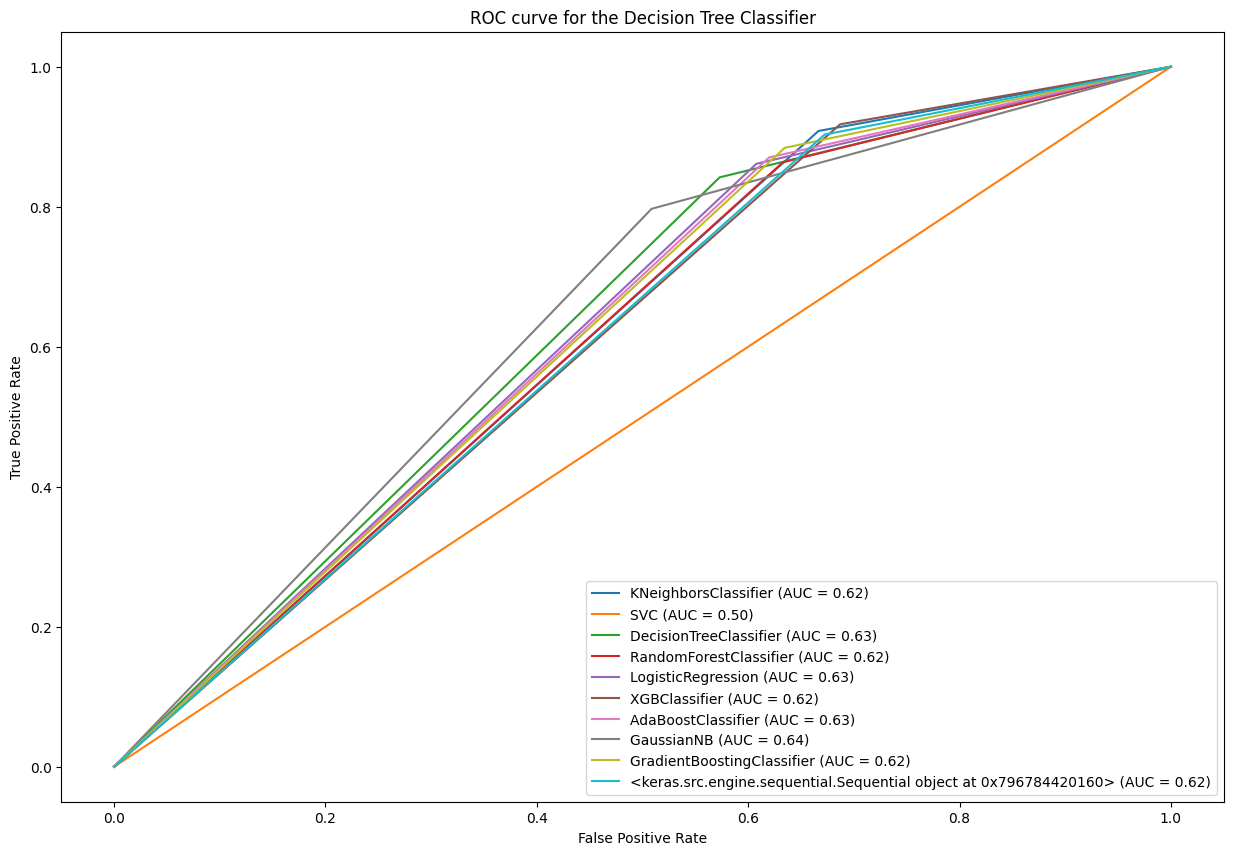

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
print(len(y_tests))
plt.figure(figsize=(15,10))
for i,j in zip(y_tests,models):
  # generate ROC curve
  fpr, tpr, thresholds = roc_curve(y_test, i)

  # calculate AUC
  auc = roc_auc_score(y_test, i)

  # plot ROC curve
  plt.plot(fpr, tpr, label=str(j).split('(')[0]+' (AUC = %0.2f)' % auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for the Decision Tree Classifier")
plt.legend(loc='lower right')
plt.show()

In [ ]:
models = [knn,svm,dc,rf,lr,xgb,ada, nb,gb,nn]

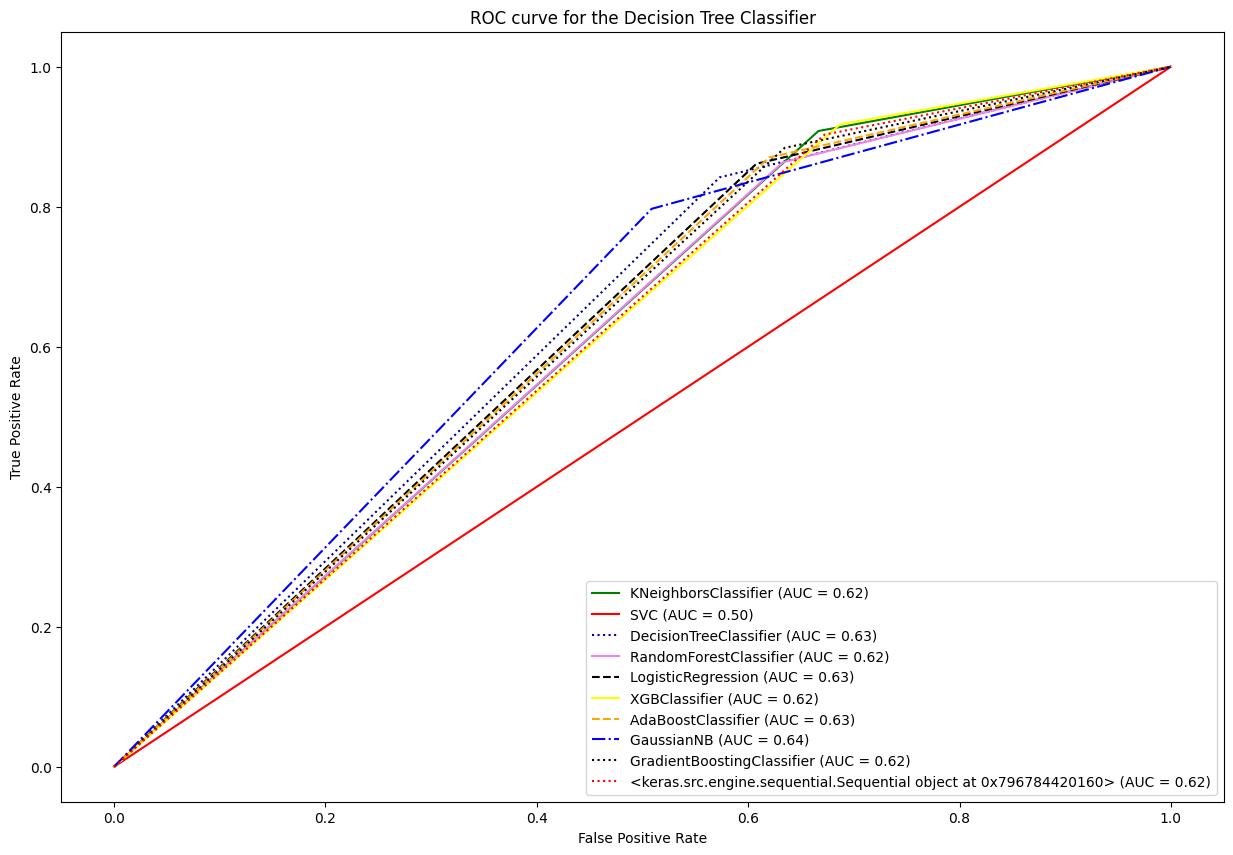

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Assuming you have already defined y_tests and models

plt.figure(figsize=(15, 10))
for i, j in enumerate(models):
    # Generate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_tests[i])

    # Calculate AUC
    auc = roc_auc_score(y_test, y_tests[i])


    if i == 0:
         linestyle, color = '-', 'green'
    elif i == 1:
        linestyle, color = '-', 'red'
    elif i == 2:
        linestyle, color = ':', 'darkblue'
    elif i == 3:
         linestyle, color = '-', 'violet'
    elif i == 4:
         linestyle, color = '--', 'black'
    elif i == 5:
         linestyle, color = '-', 'yellow'
    elif i == 6:
         linestyle, color = '--', 'orange'
    elif i == 7:
         linestyle, color = '-.', 'blue'
    elif i == 8:
         linestyle, color = ':', 'black'
    else:
         linestyle, color = ':', 'red'



    # Plot ROC curve
    plt.plot(fpr, tpr, label=str(j).split('(')[0] + ' (AUC = %0.2f)' % auc, linestyle=linestyle, color=color)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for the Decision Tree Classifier")
plt.legend(loc='lower right')
plt.show()
